# Clustering and t-Stochastic Neighboring Embeddings #
### Import libraries, setup environment ###

In [15]:
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_columns', 150)
path='C:\\usersCode\\MScDataScience\\Multimodal analysis\\Preprocessing\\'

#### Read input user data ####

In [2]:
df = pd.read_excel(path+'athina_playlist_metadata.xlsx')
df.tail()

,acousticness,activity,age,artist_name,danceability,energy,gender,id,instrumentalness,liveness,location,loudness,mood,period,popularity,release_date,song_name,speechiness,tempo,user_id,valence
618,0.09830,commuting,40,Deep Purple,0.632,0.586,male,5SAUIWdZ04OxYfJFDchC7S,0.581000,0.0535,outdoor,-11.333,excited,midday,63.0,1972-03-25,Smoke on the Water,0.0284,114.243,9,0.890
619,0.07900,commuting,40,The Clash,0.742,0.833,male,39shmbIHICJ2Wxnk1fPSdz,0.000000,0.3840,outdoor,-6.463,excited,midday,77.0,1982,Should I Stay or Should I Go - Remastered,0.1150,113.375,9,0.816
620,0.00705,commuting,40,Motörhead,0.448,0.936,male,1s0koYJ8UkZstIYYGboZa3,0.245000,0.1280,outdoor,-6.300,excited,midday,29.0,1992-07-28,You Better Run,0.0589,135.135,9,0.536
621,0.00377,commuting,40,Motörhead,0.660,0.778,male,7BwYSuWTyfcG3vtp1SnP7n,0.000856,0.3730,outdoor,-6.163,excited,midday,45.0,1979-03-24,Louie Louie,0.0583,123.205,9,0.758
622,0.00014,commuting,40,The Gone Jackals,0.305,0.882,male,2u2hIyLXxO06AudM88TmgF,0.249000,0.3880,outdoor,-13.521,excited,midday,31.0,1995,Legacy,0.0706,125.519,9,0.477


### Visualizations of features ###

female    314
male      309
Name: gender, dtype: int64


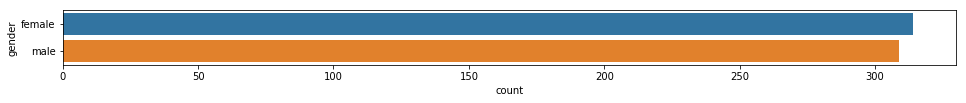

In [3]:
replace_values = {'Female': 'female'}
df = df.replace({'gender': replace_values})

print(df['gender'].value_counts())
plt.figure(figsize=(16,1))
sns.countplot(y='gender', data=df, order = df.gender.value_counts().index )

calm        162
relaxed      91
excited      77
pleased      50
sad          48
peaceful     44
happy        43
angry        33
nervous      29
bored        29
sleepy       17
Name: mood, dtype: int64


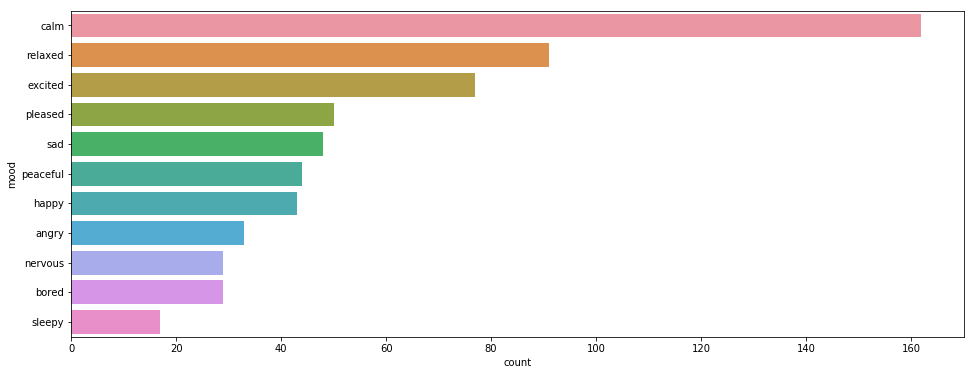

In [5]:
print(df['mood'].value_counts())
plt.figure(figsize=(16,6))
sns.countplot(y='mood', data=df, order = df.mood.value_counts().index )

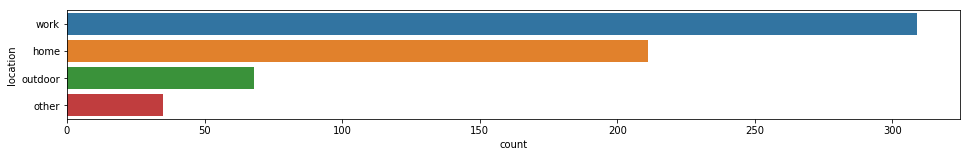

In [6]:
df['location'].value_counts()
plt.figure(figsize=(16,2))
sns.countplot(y='location', data=df, order = df.location.value_counts().index )

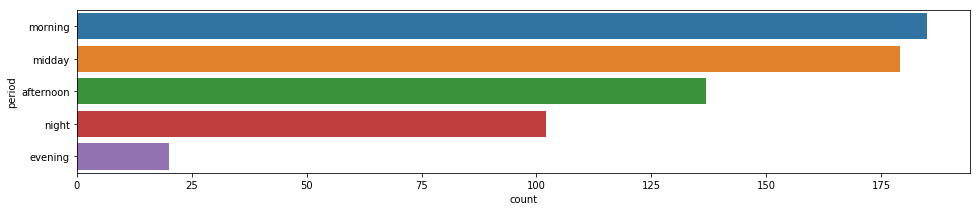

In [7]:
df['period'].value_counts()
plt.figure(figsize=(16,3))
sns.countplot(y='period', data=df, order = df.period.value_counts().index )

working        362
amusing        141
commuting       44
studying        38
working out     29
other            9
Name: activity, dtype: int64


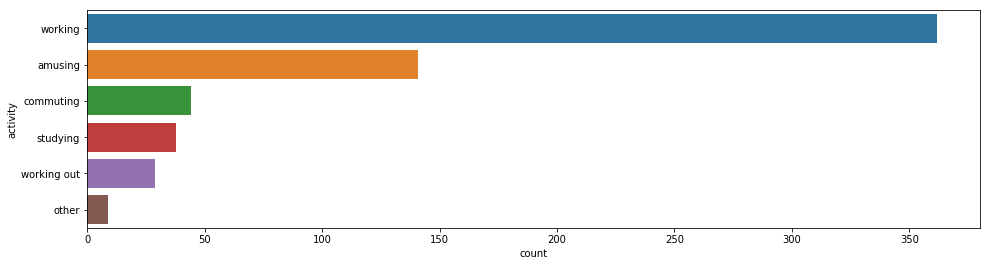

In [8]:
print(df['activity'].value_counts())
plt.figure(figsize=(16,4))
sns.countplot(y='activity', data=df, order = df.activity.value_counts().index )

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 623 entries, 0 to 622
Data columns (total 21 columns):
acousticness        432 non-null float64
activity            623 non-null object
age                 623 non-null int64
artist_name         623 non-null object
danceability        432 non-null float64
energy              432 non-null float64
gender              623 non-null object
id                  432 non-null object
instrumentalness    432 non-null float64
liveness            432 non-null float64
location            623 non-null object
loudness            432 non-null float64
mood                623 non-null object
period              623 non-null object
popularity          432 non-null float64
release_date        432 non-null object
song_name           623 non-null object
speechiness         432 non-null float64
tempo               432 non-null float64
user_id             623 non-null int64
valence             432 non-null float64
dtypes: float64(10), int64(2), object(9)
memory

#### Drop NaN values in Spotify metadata ####

In [10]:
df = df.drop('user_id', axis=1)
df = df.dropna()
df.head()

,acousticness,activity,age,artist_name,danceability,energy,gender,id,instrumentalness,liveness,location,loudness,mood,period,popularity,release_date,song_name,speechiness,tempo,valence
0,0.1430,studying,44,Stive Morgan,0.517,0.671,female,6x4QOwELkBmymbbm3Q2gvz,0.392000,0.0974,other,-10.072,pleased,evening,19.0,2019-04-25,My Angel (Piano Theme 2019),0.0279,188.021,0.8620
1,0.4070,working,44,The Rasmus,0.544,0.463,female,4khu91lkXFEebpfrUs3f81,0.000000,0.0748,work,-6.832,pleased,evening,43.0,2009-11-09,October & April,0.0294,131.842,0.2820
2,0.6960,working,44,R Armando Morabito,0.553,0.528,female,7f7f1GcRnsa4EZ2VZ1ZcsV,0.001080,0.1040,work,-12.852,pleased,evening,33.0,2014-12-23,One More Time (feat. Malukah & Tina Guo),0.0306,143.937,0.0952
3,0.0863,studying,44,DJ Snake,0.649,0.716,female,0lYBSQXN6rCTvUZvg9S0lU,0.000026,0.1350,work,-5.371,relaxed,morning,80.0,2016-08-05,Let Me Love You,0.0349,99.988,0.1630
4,0.0275,studying,44,Harry Styles,0.516,0.595,female,5Ohxk2dO5COHF1krpoPigN,0.000000,0.1090,work,-4.630,relaxed,morning,78.0,2017-05-12,Sign of the Times,0.0313,119.972,0.2220


### One-hot encoding of categorical features ###
We set *mood* as the target variable of the model, encode all categorical features and drop the following features
'artist_name', 'id', 'song_name', 'release_date' as they do no help with clustering, they have distinct values.


In [128]:
df_enc = df
Y = df['mood']
the_loc = df['location']
dtime = df['period']
activ = df['activity']
artist_song = df['artist_name']+'-'+df['song_name']

def encode_features(df_enc, location, activity, gender, period):
    #encode location
    one_hot_enc = pd.get_dummies(df_enc[location])
    df_enc = df_enc.drop('location', axis=1)
    df_enc = df_enc.join(one_hot_enc)
    #encode activity
    replace_values = {'other': 'activity_other'}
    df_enc = df_enc.replace({'activity': replace_values})
    one_hot_enc = pd.get_dummies(df_enc[activity])
    df_enc = df_enc.drop('activity', axis=1)
    df_enc = df_enc.join(one_hot_enc)
    #encode gender
    one_hot_enc = pd.get_dummies(df_enc[gender])
    df_enc = df_enc.drop('gender', axis=1)
    df_enc = df_enc.join(one_hot_enc)
    #encode period
    one_hot_enc = pd.get_dummies(df_enc[period])
    df_enc = df_enc.drop('period', axis=1)
    df_enc = df_enc.join(one_hot_enc)
    
    #encode mood
    #one_hot_enc = pd.get_dummies(df['mood'])
    #df_enc = df_enc.drop('mood', axis=1) 
    #df_enc = df_enc.join(one_hot_enc)

    replace_values = {'pleased': 'contentment', 'relaxed': 'contentment', 'calm': 'contentment', 
                     'peaceful':'contentment', 'excited':'excitement',
                     'happy':'excitement', 'nervous':'distress', 'angry':'distress', 'annoying':'distress', 
                     'sad':'depression', 'sleepy': 'contentment', 'bored': 'depression'}
    #df_enc = df_enc.replace({'mood': replace_values})

    df_enc = df_enc.drop(['artist_name', 'id', 'song_name', 'release_date', 'mood'], axis = 1)
    #df_enc = df_enc.drop(['artist_name', 'id', 'song_name', 'release_date'], axis = 1)
    return df_enc
    
df_enc = encode_features(df_enc, 'location', 'activity', 'gender', 'period')
df_enc.head()
df_enc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 432 entries, 0 to 622
Data columns (total 28 columns):
acousticness        432 non-null float64
age                 432 non-null int64
danceability        432 non-null float64
energy              432 non-null float64
instrumentalness    432 non-null float64
liveness            432 non-null float64
loudness            432 non-null float64
popularity          432 non-null float64
speechiness         432 non-null float64
tempo               432 non-null float64
valence             432 non-null float64
home                432 non-null uint8
other               432 non-null uint8
outdoor             432 non-null uint8
work                432 non-null uint8
activity_other      432 non-null uint8
amusing             432 non-null uint8
commuting           432 non-null uint8
studying            432 non-null uint8
working             432 non-null uint8
working out         432 non-null uint8
female              432 non-null uint8
male             

### Scale data with MinMaxScaler before applying k-Means ###
#### Range of -1,1 is used ####

In [129]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1,1)).fit(df_enc)
d_scaled = scaler.transform(df_enc)
print(d_scaled.min(), d_scaled.max())

-1.0 1.0000000000000004


### k-Means ###
#### Apply K-means and find optimum number of clusters using silhouette score####

In [107]:
for num_clusters in range(2,20):
    clusterer = KMeans(n_clusters=num_clusters, n_jobs=4)
    preds = clusterer.fit_predict(d_scaled)
    # centers = clusterer.cluster_centers_
    score = silhouette_score (d_scaled, preds)
    print ("For n_clusters = {}, Kmeans silhouette score is {})".format(num_clusters, score))

For n_clusters = 2, Kmeans silhouette score is 0.23948784647578525)
For n_clusters = 3, Kmeans silhouette score is 0.25796756366562096)
For n_clusters = 4, Kmeans silhouette score is 0.244430729432745)
For n_clusters = 5, Kmeans silhouette score is 0.23606254721696618)
For n_clusters = 6, Kmeans silhouette score is 0.26032369280058654)
For n_clusters = 7, Kmeans silhouette score is 0.26207309469362366)
For n_clusters = 8, Kmeans silhouette score is 0.2739684881665817)
For n_clusters = 9, Kmeans silhouette score is 0.2868456033821843)
For n_clusters = 10, Kmeans silhouette score is 0.2936460670227304)
For n_clusters = 11, Kmeans silhouette score is 0.2990663030493618)
For n_clusters = 12, Kmeans silhouette score is 0.3094580209386481)
For n_clusters = 13, Kmeans silhouette score is 0.3213709522554202)
For n_clusters = 14, Kmeans silhouette score is 0.3184916277838971)
For n_clusters = 15, Kmeans silhouette score is 0.3418979520771938)
For n_clusters = 16, Kmeans silhouette score is 0.34

In [130]:
kmeans = KMeans(n_clusters=12, random_state=2020).fit(d_scaled)
clusters = kmeans.labels_
print(clusters.shape)

(432,)


### DBSCAN ###
#### Scale data because t-SNE relies on neighborhods ####

In [43]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(df_enc)
d_scaled = scaler.transform(df_enc)
print(d_scaled.min(), d_scaled.max())

-4.741122768879967 8.426149773176357


#### Find optimal epsilon ####
#### The optimal value for epsilon will be found at the point of maximum curvature. ####

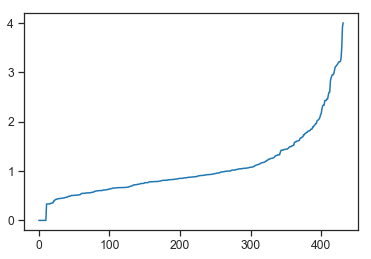

In [121]:
from sklearn.neighbors import NearestNeighbors

neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(d_scaled)
distances, indices = nbrs.kneighbors(d_scaled)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [168]:
# to be completed
from sklearn.cluster import DBSCAN

db_clu = DBSCAN(eps=2, min_samples=9).fit(d_scaled)
clusters = db_clu.labels_
#d_scaled['db_scan'] = labels

#number of clusters
n_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
n_noise = list(clusters).count(-1)

print('Estimated number of clusters:', n_clusters)
print('Estimated number of noise points:', n_noise)
df_enc.head(10)


Estimated number of clusters: 12
Estimated number of noise points: 138


,acousticness,age,danceability,energy,instrumentalness,liveness,loudness,popularity,speechiness,tempo,valence,home,other,outdoor,work,activity_other,amusing,commuting,studying,working,working out,female,male,afternoon,evening,midday,morning,night
0,0.1430,44,0.517,0.671,0.392000,0.0974,-10.072,19.0,0.0279,188.021,0.8620,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0
1,0.4070,44,0.544,0.463,0.000000,0.0748,-6.832,43.0,0.0294,131.842,0.2820,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0
2,0.6960,44,0.553,0.528,0.001080,0.1040,-12.852,33.0,0.0306,143.937,0.0952,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0
3,0.0863,44,0.649,0.716,0.000026,0.1350,-5.371,80.0,0.0349,99.988,0.1630,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0
4,0.0275,44,0.516,0.595,0.000000,0.1090,-4.630,78.0,0.0313,119.972,0.2220,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0
5,0.1420,44,0.459,0.545,0.000000,0.1050,-4.874,60.0,0.0282,137.941,0.1940,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0
6,0.1230,44,0.478,0.633,0.000000,0.4100,-6.190,67.0,0.0345,89.909,0.2870,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0
7,0.0641,44,0.645,0.787,0.513000,0.3410,-4.707,54.0,0.0274,84.116,0.9060,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0
8,0.1430,44,0.517,0.671,0.392000,0.0974,-10.072,19.0,0.0279,188.021,0.8620,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0
9,0.2870,44,0.441,0.664,0.000010,0.1410,-8.958,31.0,0.0424,132.136,0.2010,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0


In [55]:
set(labels)
colors = ['royalblue', 'maroon', 'forestgreen', 'mediumorchid', 'tan', 'deeppink', 'olive', 'goldenrod', 'lightcyan', 'navy']
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])

### Apply t-SNE on clustered data ###
#### k-means was used ####

In [131]:
x_embedded = TSNE(n_components=2, learning_rate=100).fit_transform(d_scaled)
print(x_embedded.shape)
df_plot = pd.DataFrame()
df_plot['dim_1']  = x_embedded[:,0]
df_plot['dim_2']  = x_embedded[:,1]
df_plot['Mood'] = Y
df_plot['Location'] = the_loc
df_plot['Period'] = dtime
df_plot['Activity'] = activ
df_plot['Artist_Song'] = artist_song
df_plot['clusters'] = clusters

df_plot.head()

(432, 2)


,dim_1,dim_2,Mood,Location,Period,Activity,Artist_Song,clusters
0,8.715032,2.153782,pleased,other,evening,studying,Stive Morgan-My Angel (Piano Theme 2019),7
1,5.691143,-10.550234,pleased,work,evening,working,The Rasmus-October & April,0
2,5.687331,-10.565908,pleased,work,evening,working,R Armando Morabito-One More Time (feat. Maluka...,0
3,15.592608,-17.348011,relaxed,work,morning,studying,DJ Snake-Let Me Love You,2
4,15.594250,-17.350399,relaxed,work,morning,studying,Harry Styles-Sign of the Times,2


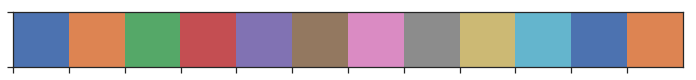

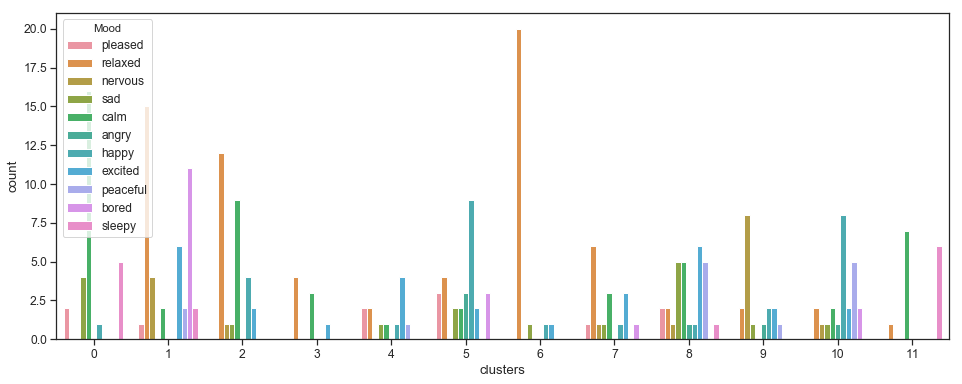

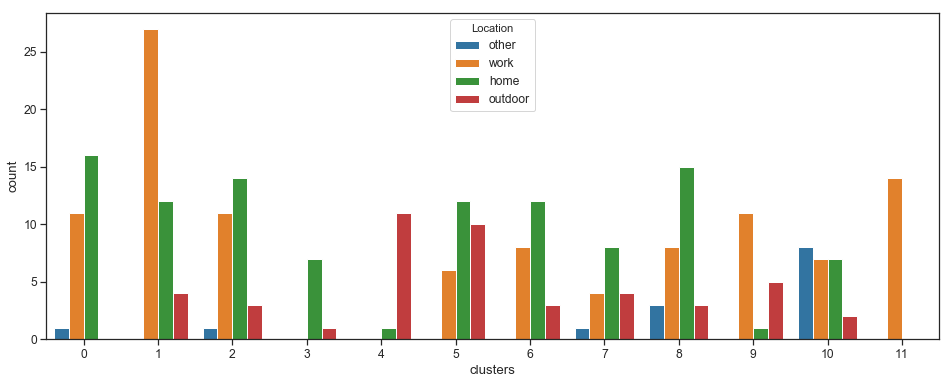

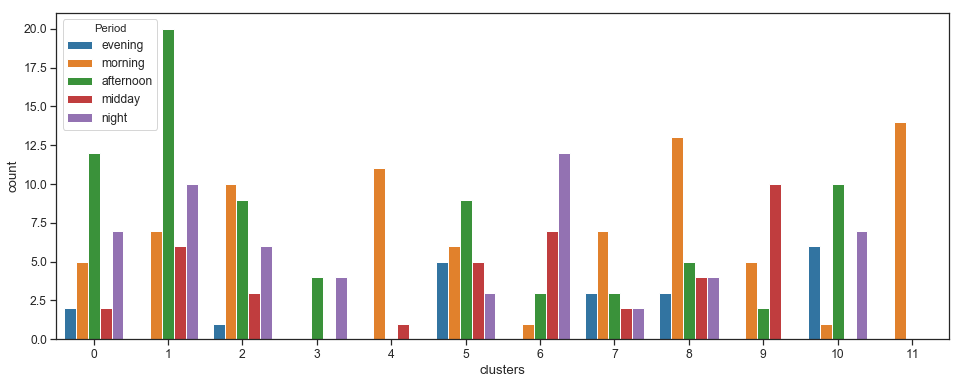

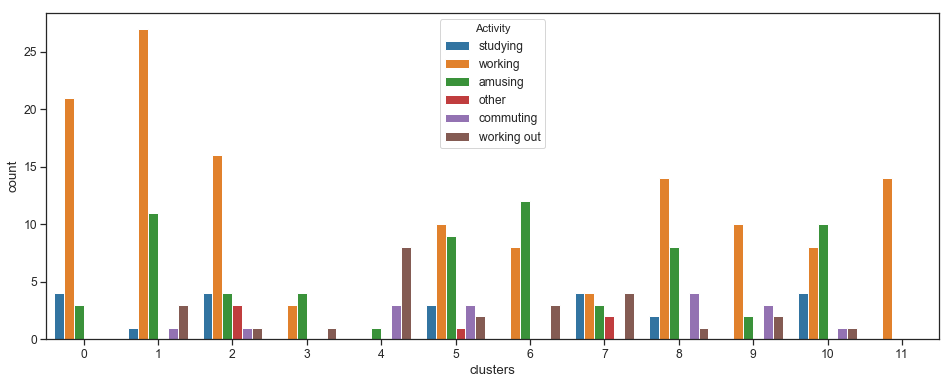

In [125]:
mpalette = sns.palplot(sns.color_palette('deep',12))
plt.figure(figsize=(16,6))
ax = sns.countplot(x="clusters", hue="Mood", data=df_plot, palette= mpalette)
plt.show()
plt.figure(figsize=(16,6))
ax = sns.countplot(x="clusters", hue="Location", data=df_plot, palette= mpalette)
plt.show()
plt.figure(figsize=(16,6))
ax = sns.countplot(x="clusters", hue="Period", data=df_plot, palette= mpalette)
plt.show()
plt.figure(figsize=(16,6))
ax = sns.countplot(x="clusters", hue="Activity", data=df_plot, palette= mpalette)
plt.show()

### Plot Clusters ###

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


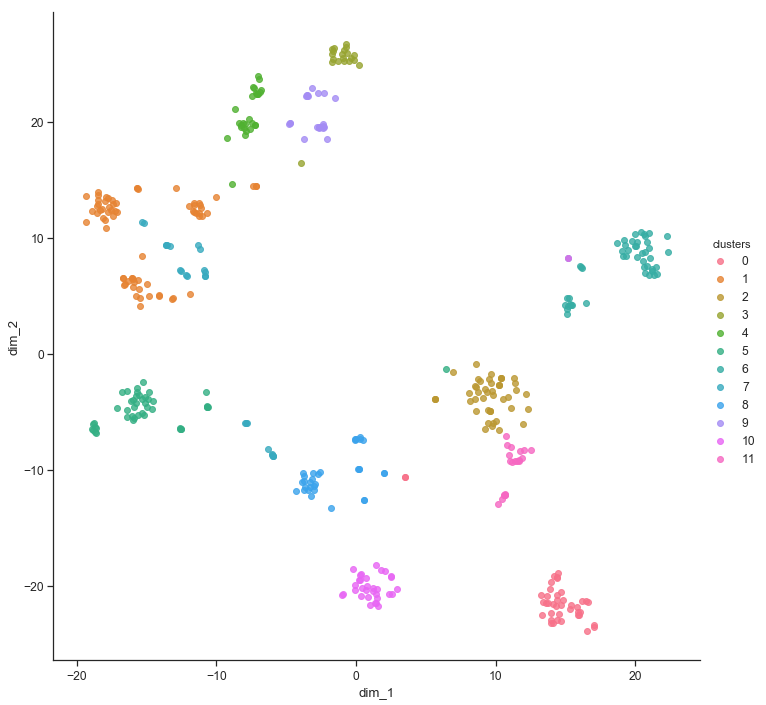

In [20]:
sns.set_context('notebook', font_scale = 1.1)
sns.set_style('ticks')

sns.lmplot(x='dim_1',
          y='dim_2',
          data = df_plot,
          fit_reg = False,
          legend = True,
          size = 10,
          hue = 'clusters' )

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


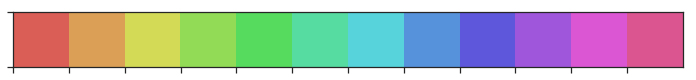

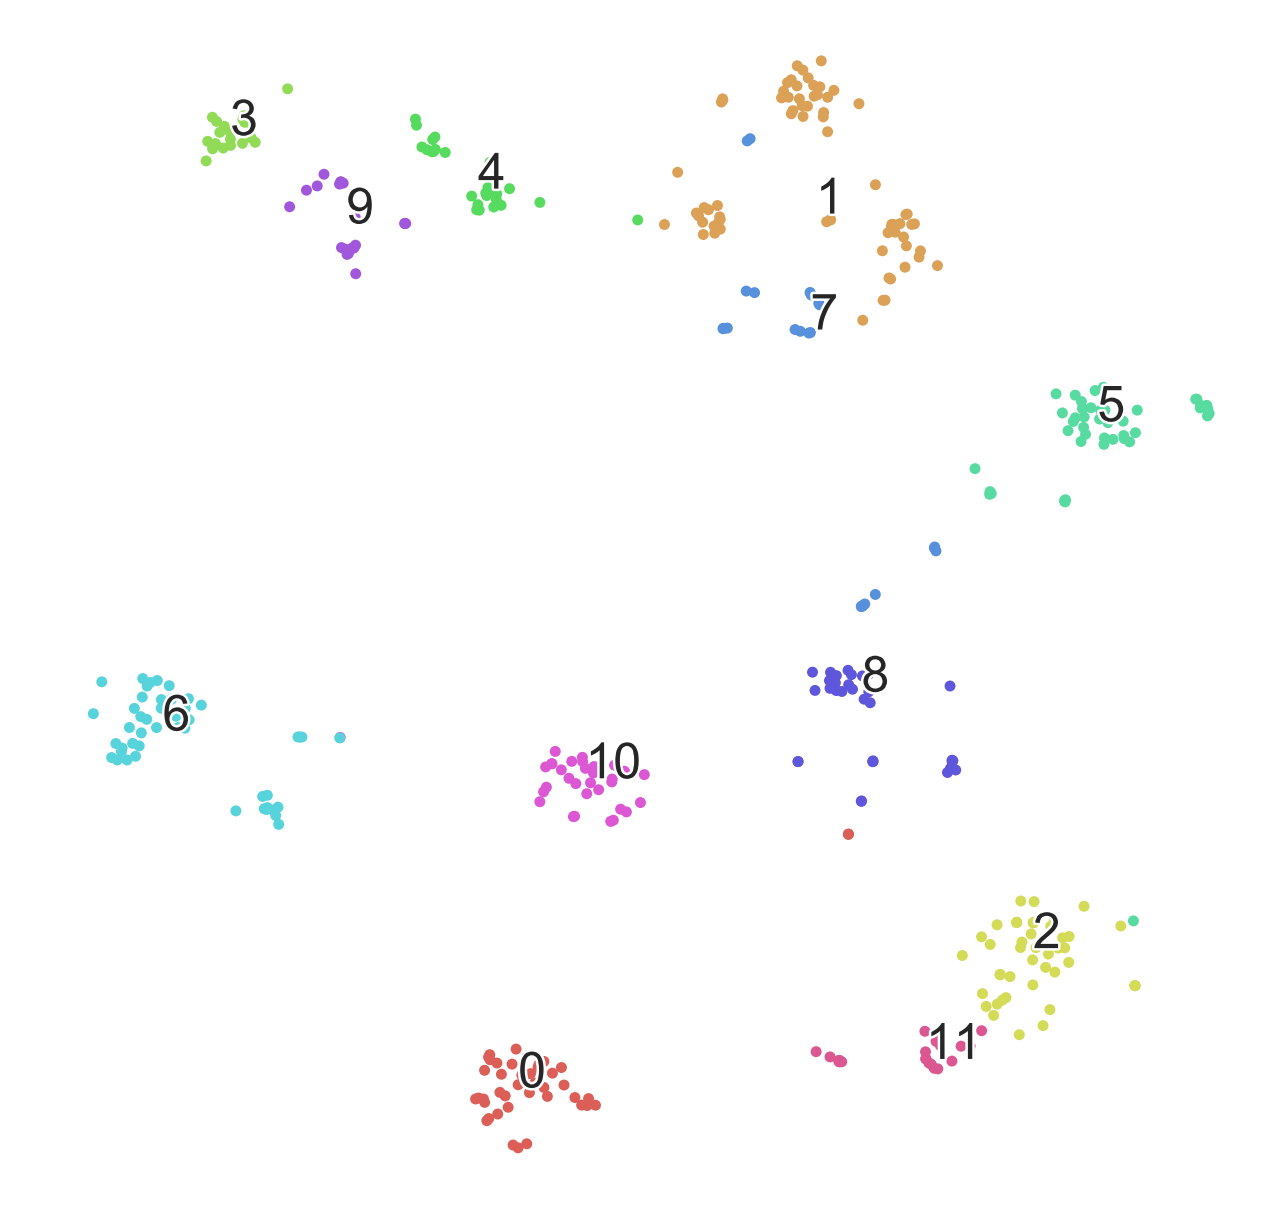

In [133]:
import matplotlib.patheffects as PathEffects

n_clusters=12
# An user defined function to create scatter plot of vectors
def scatter(x, colors):
    n_clusters=12
    # We choose a color palette with seaborn.
    palette = np.array(sns.color_palette("hls", n_clusters))

    # We create a scatter plot.
    f = plt.figure(figsize=(22, 22))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=120,
                    c=palette[colors.astype(np.int)])
    
    ax.axis('off')
    ax.axis('tight')

    # We add the labels for each cluster.
    txts = []
    for i in range(n_clusters):
        # Position of each label.
        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=50)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts


print(list(range(0,n_clusters)))
sns.palplot(np.array(sns.color_palette("hls", n_clusters)))
scatter(x_embedded, clusters)
plt.savefig('digits_tsne-generated_18_cluster.png', dpi=120)

### Predictions based on song metadata and user context ###

In [146]:
#1.get user context (target is in what cluster it belongs)
#2.get spotify metadata
#3.
pred_list = pd.read_excel(path + 'predictions.xlsx', sheet_name='Athina')
pred_list.head()

,age,gender,location,activity,period,song,artist
0,44,female,home,working,morning,solitude,VNV Nation


In [23]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials #to access authorised Spotify data

client_id = '8038c4be0f8a4844982edce1b2282ebc'
client_secret = '1bd8da3a234e4060a6801a432c0e877d'

client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)

sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager) #spotify object to access API

In [24]:
# extract audio features for each song
def audio_features(song_info, song_name, track_id, album_metadata) :    
    spotify_song = {}
  
    #add song metadata
    spotify_song['user_id']= song_info[0]
    spotify_song['age']= song_info[1]
    spotify_song['gender']= song_info[2]
    spotify_song['mood']= song_info[3]
    spotify_song['location']= song_info[4]
    spotify_song['activity']= song_info[5]
    spotify_song['period']= song_info[6]
                                       
    features = sp.audio_features(track_id)
    if not features is None:
      spotify_song['id'] = features[0]['id']
      #Append to relevant key-value
      spotify_song['acousticness'] = features[0]['acousticness']
      spotify_song['danceability'] = features[0]['danceability']
      spotify_song['energy'] = features[0]['energy']
      spotify_song['instrumentalness'] = features[0]['instrumentalness']
      spotify_song['liveness'] = features[0]['liveness']
      spotify_song['loudness'] = features[0]['loudness']
      spotify_song['speechiness'] = features[0]['speechiness']
      spotify_song['tempo'] = features[0]['tempo']
      spotify_song['valence'] = features[0]['valence']
      #popularity is stored elsewhere
      pop = sp.track(track_id)#track['id'])
      spotify_song['popularity'] = pop['popularity']
      print(album_metadata)
      spotify_song['release_date'] = album_metadata['album']['release_date']
      spotify_song['artist_name'] = album_metadata['artists'][0]['name']    
      spotify_song['song_name'] = pop['name']       

    return spotify_song

def add_empty_row(song_info, song_name):
    spotify_song = {}

    #add song metadata
    spotify_song['user_id']= song_info[0]
    spotify_song['age']= song_info[1]
    spotify_song['gender']= song_info[2]
    spotify_song['mood']= song_info[3]
    spotify_song['location']= song_info[4]
    spotify_song['activity']= song_info[5]
    spotify_song['period']= song_info[6]
    
    spotify_song['id']=pd.NaT
    spotify_song['acousticness'] = pd.NaT
    spotify_song['danceability'] = pd.NaT
    spotify_song['energy'] = pd.NaT
    spotify_song['instrumentalness'] = pd.NaT
    spotify_song['liveness'] = pd.NaT
    spotify_song['loudness'] = pd.NaT
    spotify_song['speechiness'] = pd.NaT
    spotify_song['tempo'] = pd.NaT
    spotify_song['valence'] = pd.NaT        
    spotify_song['popularity'] = pd.NaT
    spotify_song['release_date'] = pd.NaT
    spotify_song['artist_name'] = song_name.split(':')[1]
    spotify_song['song_name'] = song_name.split(':')[0]

    return spotify_song

In [25]:
songs_found = []

for i,row in pred_list.iterrows():  #chosen track  
    song = row['song']+':'+row['artist']
    print(song)
    result = sp.search(song) #search query
    song_info = ['', row['age'], row['gender'], '', row['location'], row['activity'], row['period']]
    if len(result['tracks']['items'])>0:
        track_id = result['tracks']['items'][0]['id']   
        songs_found.append(audio_features(song_info, song, track_id, result['tracks']['items'][0]))
    else:
        print('song {0} not found'.format(song))
        songs_found.append(add_empty_row(song_info, song))
        #Append to relevant key-value
    
print('added {0} tracks'.format(len(songs_found)))
pred_output = pd.io.json.json_normalize(songs_found)

solitude:VNV Nation
{'album': {'album_type': 'single', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/4KlYg0F5KG9QNDFKaeTNAy'}, 'href': 'https://api.spotify.com/v1/artists/4KlYg0F5KG9QNDFKaeTNAy', 'id': '4KlYg0F5KG9QNDFKaeTNAy', 'name': 'VNV Nation', 'type': 'artist', 'uri': 'spotify:artist:4KlYg0F5KG9QNDFKaeTNAy'}], 'available_markets': ['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH', 'BO', 'BR', 'CA', 'CH', 'CL', 'CO', 'CR', 'CY', 'CZ', 'DE', 'DK', 'DO', 'DZ', 'EC', 'EE', 'EG', 'ES', 'FI', 'FR', 'GB', 'GR', 'GT', 'HK', 'HN', 'HU', 'ID', 'IE', 'IL', 'IN', 'IS', 'IT', 'JO', 'JP', 'KW', 'LB', 'LI', 'LT', 'LU', 'LV', 'MA', 'MC', 'MT', 'MX', 'MY', 'NI', 'NL', 'NO', 'NZ', 'OM', 'PA', 'PE', 'PH', 'PL', 'PS', 'PT', 'PY', 'QA', 'RO', 'SA', 'SE', 'SG', 'SK', 'SV', 'TH', 'TN', 'TR', 'TW', 'US', 'UY', 'VN', 'ZA'], 'external_urls': {'spotify': 'https://open.spotify.com/album/5C8NGD2Lw95lb7s98BUpgM'}, 'href': 'https://api.spotify.com/v1/albums/5C8NGD2Lw95lb7s98BUpgM', '

In [26]:
pred_output.head()
pred_output.to_excel('athina_playlist_predictions.xlsx', index=False)

In [135]:
pred_output = pd.read_excel('athina_playlist_predictions.xlsx')
pred_output.head()

,acousticness,activity,age,artist_name,danceability,energy,gender,id,instrumentalness,liveness,location,loudness,mood,period,popularity,release_date,song_name,speechiness,tempo,user_id,valence
0,0.263,working,44,VNV Nation,0.556,0.798,female,4JScTEXCX6LfmUArUhikgD,0.839,0.13,home,-9.443,NaN,morning,9,2013-09-03,Solitude,0.0296,124.955,NaN,0.342


In [136]:
pred_output = encode_features(pred_output, 'location', 'activity', 'gender', 'period')
for col in df_enc.columns:
    if col not in pred_output.columns:
        print(col)
        dat2 = pd.DataFrame({col: [0]})
        pred_output = pred_output.join(dat2)

pred_output = pred_output.drop('user_id', axis=1)
pred_output.head()

other
outdoor
work
activity_other
amusing
commuting
studying
working out
male
afternoon
evening
midday
night


,acousticness,age,danceability,energy,instrumentalness,liveness,loudness,popularity,speechiness,tempo,valence,home,working,female,morning,other,outdoor,work,activity_other,amusing,commuting,studying,working out,male,afternoon,evening,midday,night
0,0.263,44,0.556,0.798,0.839,0.13,-9.443,9,0.0296,124.955,0.342,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [137]:
scaler = MinMaxScaler(feature_range=(-1,1)).fit(pred_output)
d_scaled = scaler.transform(pred_output)
print(d_scaled.min(), d_scaled.max())

-1.0 -0.9999999999999999


In [144]:
predicted_clu = kmeans.predict(d_scaled)
print('predicted cluster:', predicted_clu)
df_filtered = df_plot[df_plot['clusters'] == predicted_clu[0]]
total = len(df_filtered)
print('total songs:', total)
df_filtered.head(total)

predicted cluster: [7]
total songs: 25


,dim_1,dim_2,Mood,Location,Period,Activity,Artist_Song,clusters
0,8.715032,2.153782,pleased,other,evening,studying,Stive Morgan-My Angel (Piano Theme 2019),7
11,8.670270,2.329094,relaxed,home,evening,studying,Flaer Smin-Catharsis,7
12,8.662120,2.279759,relaxed,home,evening,studying,Depeche Mode-The Things You Said - 2006 Remaster,7
77,1.384853,12.139450,NaN,NaN,NaN,NaN,NaN,7
82,1.353792,12.122103,NaN,NaN,NaN,NaN,NaN,7
104,1.371088,12.138169,NaN,NaN,NaN,NaN,NaN,7
105,2.157762,13.810287,NaN,NaN,NaN,NaN,NaN,7
109,1.504746,12.151318,NaN,NaN,NaN,NaN,NaN,7
110,2.291719,20.648222,NaN,NaN,NaN,NaN,NaN,7
120,2.190904,20.549131,NaN,NaN,NaN,NaN,NaN,7
